In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import Image
import scipy.stats as st
import numpy as np
from scipy.stats import shapiro

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
#!pip install ipyleaflet

In [182]:
def count_duplicated_rows(df):
    return df.duplicated().sum()

def count_nan_values(df):
    return df.isnull().sum()

def detect_outliers(df, column_names):
    """
    Detects outliers in a specified column or columns of a dataframe using the IQR method.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    column_names (str or list of str): The name(s) of the column(s) to check for outliers.

    Returns:
    DataFrame: A dataframe containing the outliers.
    """
    # Convert column_names to a list if it is a single column name
    if isinstance(column_names, str):
        column_names = [column_names]

    outliers = pd.DataFrame()

    for column_name in column_names:
  
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

        column_outliers['Outlier_Column'] = column_name

        outliers = outliers.append(column_outliers)

    return outliers

In [183]:
bikes_data_2022_dublin = pd.read_csv("dublinbike-historical-data-2022-01.csv")

bikes_data_2022_dublin.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012


In [184]:
bikes_data_2022_dublin.shape

(163699, 11)

In [185]:
bikes_data_size_dublin = bikes_data_2022_dublin.size
print(f'Total number of elements in the DataFrame: {bikes_data_size_dublin}.')

Total number of elements in the DataFrame: 1800689.


In [186]:
bikes_data_2022_dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163699 entries, 0 to 163698
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATION ID             163699 non-null  int64  
 1   TIME                   163699 non-null  object 
 2   LAST UPDATED           163699 non-null  object 
 3   NAME                   163699 non-null  object 
 4   BIKE_STANDS            163699 non-null  int64  
 5   AVAILABLE_BIKE_STANDS  163699 non-null  int64  
 6   AVAILABLE_BIKES        163699 non-null  int64  
 7   STATUS                 163699 non-null  object 
 8   ADDRESS                163699 non-null  object 
 9   LATITUDE               163699 non-null  float64
 10  LONGITUDE              163699 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 13.7+ MB


In [187]:
bikes_data_2022_dublin.describe()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,60.979413,32.000128,19.200191,12.741410,53.345687,-6.264389
std,37.757380,7.670569,9.636346,7.932004,0.007647,0.018114
min,2.000000,1.000000,0.000000,0.000000,53.330100,-6.310020
25%,31.000000,29.000000,12.000000,7.000000,53.339800,-6.275230
50%,61.000000,30.000000,19.000000,12.000000,53.345900,-6.262980
75%,90.000000,40.000000,26.000000,18.000000,53.351000,-6.251560
max,507.000000,40.000000,40.000000,40.000000,53.360000,-6.230850


In [188]:
print(f"Number of duplicate rows in the bike dataset for Dublin is {count_duplicated_rows(bikes_data_2022_dublin)}.")

Number of duplicate rows in the bike dataset for Dublin is 0.


In [189]:
count_nan_values(bikes_data_2022_dublin)

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

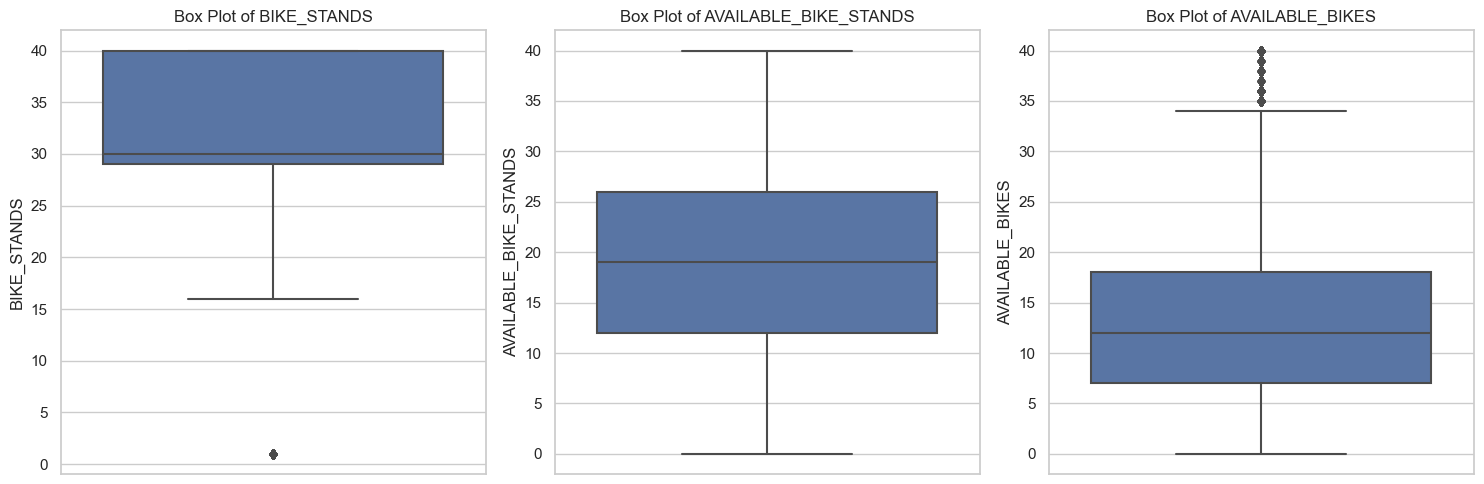

In [190]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting box plots for the columns of interest
plt.figure(figsize=(15, 5))

# Bike Stands
plt.subplot(1, 3, 1)
sns.boxplot(y=bikes_data_2022_dublin['BIKE_STANDS'])
plt.title('Box Plot of BIKE_STANDS')

# Available Bike Stands
plt.subplot(1, 3, 2)
sns.boxplot(y=bikes_data_2022_dublin['AVAILABLE_BIKE_STANDS'])
plt.title('Box Plot of AVAILABLE_BIKE_STANDS')

# Available Bikes
plt.subplot(1, 3, 3)
sns.boxplot(y=bikes_data_2022_dublin['AVAILABLE_BIKES'])
plt.title('Box Plot of AVAILABLE_BIKES')

plt.tight_layout()
plt.show()

Bike Stands - This plot shows a relatively consistent distribution without apparent outliers. The data points seem to be clustered around certain values, likely indicating standard sizes for bike stations.

Available Bike Stands and Available Bikes: Both these plots show a wide distribution of values, which is expected as the number of available stands and bikes would vary throughout the day. There don't appear to be extreme outliers in these plots, but this doesn't rule out the possibility of less obvious outliers.

In [191]:
outlier_data = detect_outliers(bikes_data_2022_dublin, ['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES'])
outlier_data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,Outlier_Column
110,507,2022-01-01 00:00:04,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
221,507,2022-01-01 00:30:03,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
332,507,2022-01-01 01:00:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
443,507,2022-01-01 01:30:03,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
554,507,2022-01-01 02:00:04,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS


In [192]:
outlier_data.shape

(1292, 12)

The statistical analysis using the IQR method reveals that there are 1,292 rows in the dataset considered as outliers, constituting approximately 0.79% of the data. This is a relatively small percentage, which indicates that most of the data conforms to a consistent pattern.

The outliers in the data set are not data entry errors but they represent real-world scenarios and genuine variations in bike usage. This includes fluctuations due to external factors like weather changes, special events, or rush hours. Removing these outliers might have eliminated important information that captures the true dynamics of bike availability.

Time series data, inherently includes variations over time that are crucial for understanding patterns. What might seem like outliers could be valuable data points that reflect periodic trends, seasonal effects, or other cyclical factors. As a time series model will be applied, outliers will not be removed from the dataset. 



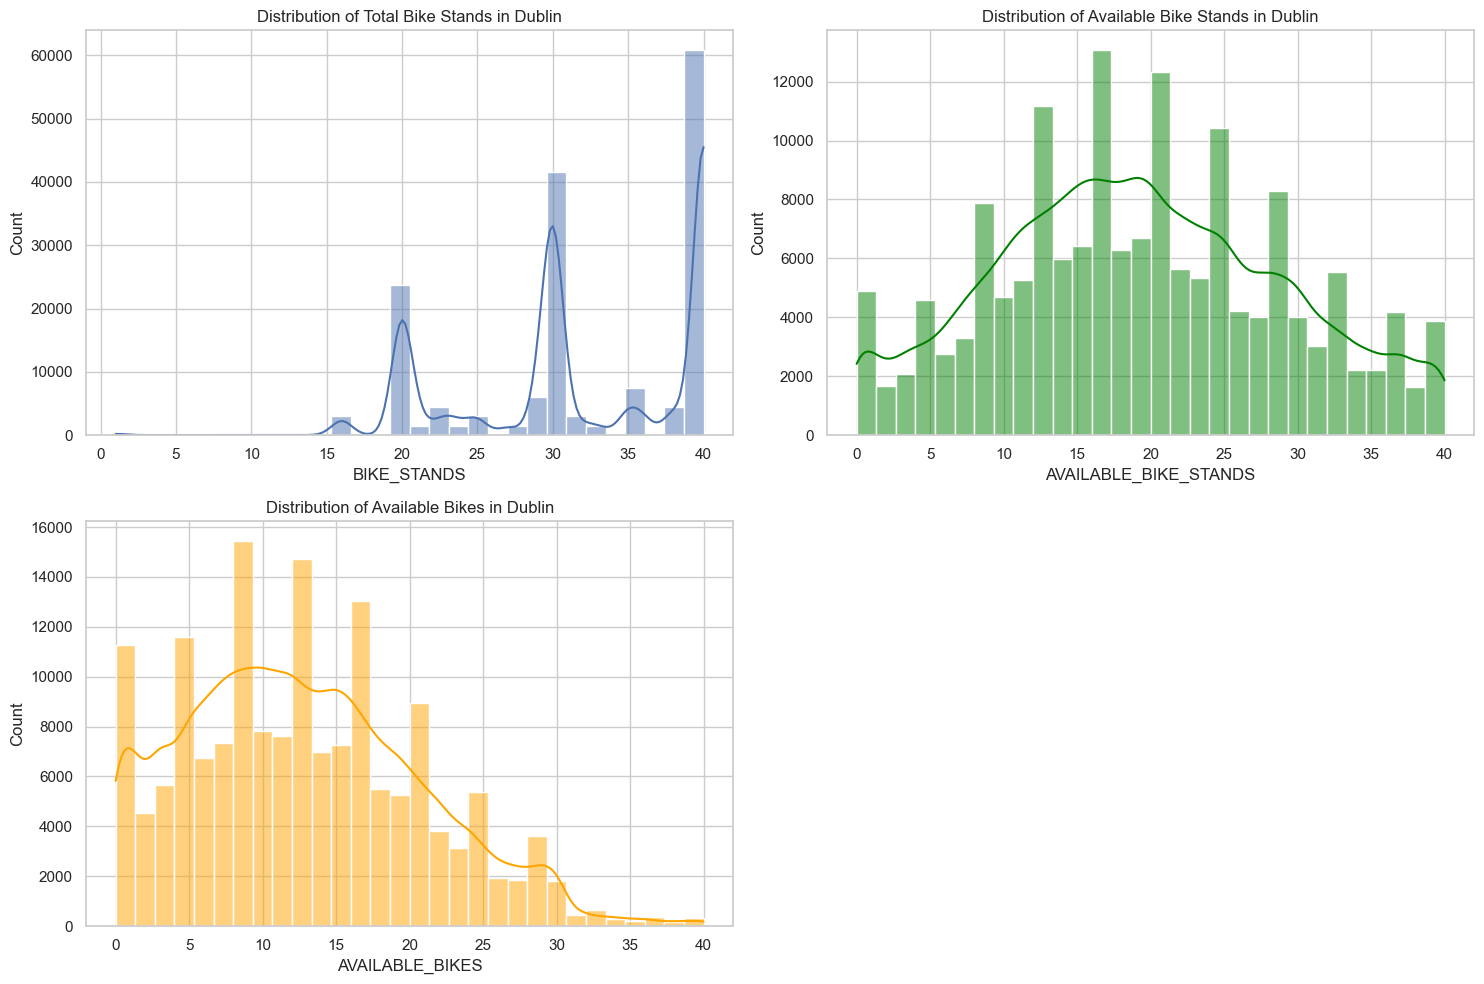

In [193]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Bike Stands
plt.subplot(2, 2, 1)
sns.histplot(bikes_data_2022_dublin['BIKE_STANDS'], kde=True, bins=30)
plt.title('Distribution of Total Bike Stands in Dublin')

# Available Bike Stands
plt.subplot(2, 2, 2)
sns.histplot(bikes_data_2022_dublin['AVAILABLE_BIKE_STANDS'], kde=True, bins=30, color='green')
plt.title('Distribution of Available Bike Stands in Dublin')

# Available Bikes
plt.subplot(2, 2, 3)
sns.histplot(bikes_data_2022_dublin['AVAILABLE_BIKES'], kde=True, bins=30, color='orange')
plt.title('Distribution of Available Bikes in Dublin')

plt.tight_layout()
plt.show()

Total Bike Stands: The distribution shows peaks at specific values (e.g., 20, 30, 40), suggesting standard capacities at many stations.

Available Bike Stands: This distribution is more spread out, indicating variability in the number of available stands at different times or stations.

Available Bikes: Similar to available stands, the distribution of available bikes is also varied, reflecting differing usage patterns across stations and times.

In [194]:
bikes_data_2022_dublin_cleaned.to_csv('bike_dublin_jan.csv', index = False)

Creating a new dataset to simplify it, as creating the interactive visualization with the whole datasetresults in a very long loading time and interruption of the notebook. The only data needed for the geographic visualization is the Name of the Station, the Latitude and Longitude. 

In [195]:
data_for_station_viz = bikes_data_2022_dublin[['NAME', 'LATITUDE', 'LONGITUDE']].drop_duplicates()

data_for_station_viz

,NAME,LATITUDE,LONGITUDE
0,BLESSINGTON STREET,53.3568,-6.26814
1,BOLTON STREET,53.3512,-6.26986
2,GREEK STREET,53.3469,-6.27298
3,CHARLEMONT PLACE,53.3307,-6.26018
4,CHRISTCHURCH PLACE,53.3434,-6.27012
...,...,...,...
106,WILTON TERRACE (PARK),53.3337,-6.24834
107,KILLARNEY STREET,53.3548,-6.24758
108,BROADSTONE,53.3547,-6.27231
109,HANOVER QUAY EAST,53.3437,-6.23175


In [196]:
dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=13)

for index, row in data_for_station_viz.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['NAME']  
    ).add_to(dublin_map)

dublin_map


## Madrid Bike Data for Jan 2022

In [197]:
from pandas import json_normalize

json_file_path = r'C:\Users\mariy\CA2\202201-json\202201.json'

df = pd.read_json(json_file_path, lines=True)

flattened_df = json_normalize(df['stations'][0]) 

print(flattened_df.head())


   activate                name  reservations_count  light  total_bases  \
0         1    Puerta del Sol A                   0      3           30   
1         1    Puerta del Sol B                   0      3           30   
2         1         Miguel Moya                   0      0           24   
3         1  Plaza Conde Suchil                   0      1           18   
4         1            Malasaña                   0      1           24   

   free_bases number           longitude  no_available  \
0           0     1a          -3.7018341             1   
1           0     1b  -3.701602938060457             1   
2          16      2          -3.7058415             0   
3           1      3          -3.7069171             0   
4           2      4          -3.7025875             0   

                                    address           latitude  dock_bikes  id  
0                       Puerta del Sol nº 1         40.4172137           0   1  
1                       Puerta del Sol

In [198]:
bike_data_madrid = json_normalize(df['stations'][0])

bike_data_madrid.head()


,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,3,30,0,1a,-3.7018341,1,Puerta del Sol nº 1,40.4172137,0,1
1,1,Puerta del Sol B,0,3,30,0,1b,-3.701602938060457,1,Puerta del Sol nº 1,40.41731271011562,0,2
2,1,Miguel Moya,0,0,24,16,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,7,3
3,1,Plaza Conde Suchil,0,1,18,1,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,14,4
4,1,Malasaña,0,1,24,2,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,17,5


id: Código de la Estación Base  
latitude: Latitud de la estación en formato WGS84  
longitude: Longitud de la Estación en formato WGS84  
name: Nombre de la Estación  
light: Grado de Ocupación (0=baja, 1=media, 2=alta, 3=inactiva)  
number: Denominación lógica de la Estación Base  
actívate: Estación activa (0=No activa, 1=activa)  
no_available: Disponibilidad de la Estación (0=disponible, 1=no disponible)  
total_bases: Número de bases de la estación  
dock_bikes: Número de bicicletas ancladas  
free_bases: Número de bases libres  
reservations_count: Número de reservas activas  
https://opendata.emtmadrid.es/Documentos/Servicios-y-estructuras-Bicimad-V1-1.aspx

In [199]:
bike_data_madrid.shape

(264, 13)

In [200]:
bike_data_madrid_size = bike_data_madrid.size
print(f'Total number of elements in the DataFrame: {bike_data_madrid_size}.')

Total number of elements in the DataFrame: 3432.


In [201]:
bike_data_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activate            264 non-null    int64 
 1   name                264 non-null    object
 2   reservations_count  264 non-null    int64 
 3   light               264 non-null    int64 
 4   total_bases         264 non-null    int64 
 5   free_bases          264 non-null    int64 
 6   number              264 non-null    object
 7   longitude           264 non-null    object
 8   no_available        264 non-null    int64 
 9   address             264 non-null    object
 10  latitude            264 non-null    object
 11  dock_bikes          264 non-null    int64 
 12  id                  264 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 26.9+ KB


In [202]:
bike_data_madrid.describe()

,activate,reservations_count,light,total_bases,free_bases,no_available,dock_bikes,id
count,264.0,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1.0,0.0,1.424242,23.920455,10.363636,0.056818,10.503788,136.829545
std,0.0,0.0,0.877442,1.877756,5.961566,0.231935,6.012027,77.475946
min,1.0,0.0,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.0,1.000000,24.000000,6.000000,0.000000,7.000000,71.750000
50%,1.0,0.0,2.000000,24.000000,11.000000,0.000000,10.000000,137.500000
75%,1.0,0.0,2.000000,24.000000,15.000000,0.000000,15.000000,203.250000
max,1.0,0.0,3.000000,30.000000,24.000000,1.000000,26.000000,270.000000


In [203]:
bike_data_madrid.to_csv('bike_madrid_jan.csv', index = False)

In [204]:
bike_data_madrid['total_bases'].unique()

array([30, 24, 18, 27, 21, 22, 20, 12], dtype=int64)

In [205]:
total_bases_frequency = bike_data_madrid['total_bases'].value_counts().sort_index()
total_bases_frequency

12      1
18      8
20      1
21     15
22      1
24    212
27     22
30      4
Name: total_bases, dtype: int64

In [206]:
print(f"Number of duplicate rows in the bike dataset for Madrid is {count_duplicated_rows(bike_data_madrid)}.")

Number of duplicate rows in the bike dataset for Madrid is 0.


In [207]:
count_nan_values(bike_data_madrid)

activate              0
name                  0
reservations_count    0
light                 0
total_bases           0
free_bases            0
number                0
longitude             0
no_available          0
address               0
latitude              0
dock_bikes            0
id                    0
dtype: int64

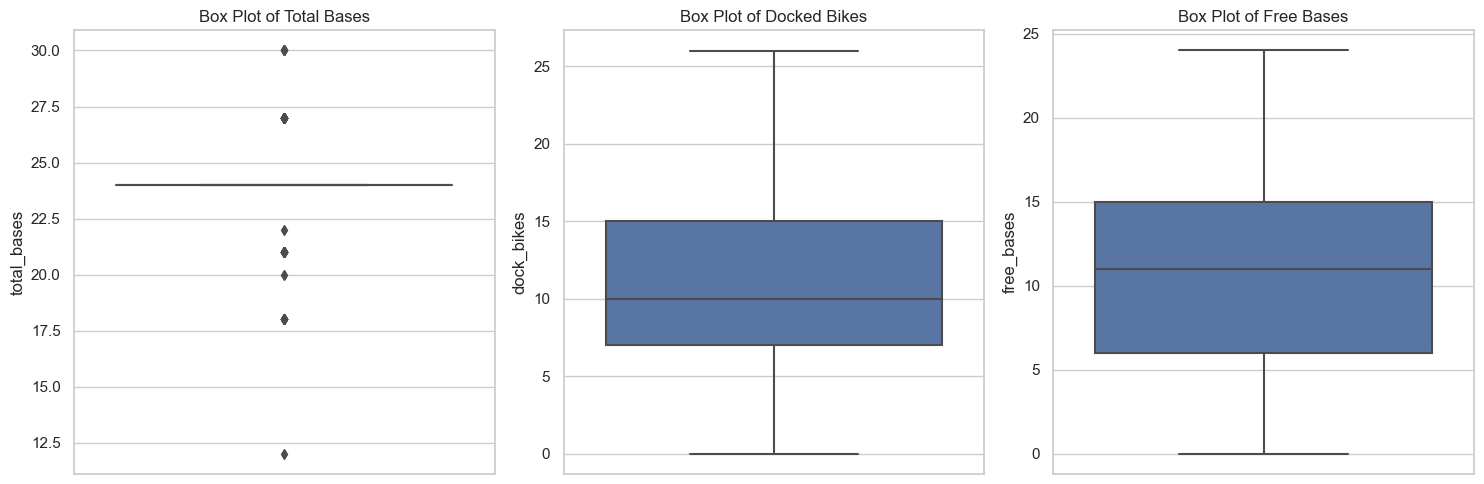

In [208]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# total_bases
plt.subplot(1, 3, 1)
sns.boxplot(y=bike_data_madrid['total_bases'])
plt.title('Box Plot of Total Bases')

# dock_bikes
plt.subplot(1, 3, 2)
sns.boxplot(y=bike_data_madrid['dock_bikes'])
plt.title('Box Plot of Docked Bikes')

# free_bases
plt.subplot(1, 3, 3)
sns.boxplot(y=bike_data_madrid['free_bases'])
plt.title('Box Plot of Free Bases')

plt.tight_layout()
plt.show()


In [209]:
outlier_data_madrid = detect_outliers(bike_data_madrid, ['total_bases','free_bases', 'dock_bikes'])
outlier_data_madrid.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,Outlier_Column
0,1,Puerta del Sol A,0,3,30,0,1a,-3.7018341,1,Puerta del Sol nº 1,40.4172137,0,1,total_bases
1,1,Puerta del Sol B,0,3,30,0,1b,-3.701602938060457,1,Puerta del Sol nº 1,40.41731271011562,0,2,total_bases
3,1,Plaza Conde Suchil,0,1,18,1,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,14,4,total_bases
5,1,Fuencarral,0,2,27,14,5,-3.70205,0,Calle Fuencarral nº 108,40.42852,10,6,total_bases
7,1,Hortaleza,0,1,21,5,7,-3.6977715,0,Calle Hortaleza nº 75,40.4251906,15,8,total_bases


In [210]:
num_outliers = len(outlier_data_madrid)
total_data_points = len(bike_data_madrid)
percentage_outliers = (num_outliers / total_data_points) * 100

percentage_outliers

19.696969696969695

For the dataset for Madrid, outliers will be kept in the dataset due to:
 - high percentage of the whole data set - the dataset for madrid is quite small as there is no time breakdown
 - the outliers are only for the total_bases column. The average number of total bases per station is approximately 23.92. The standard deviation is about 1.88, indicating a relatively small spread around the mean.
 
These outliers could be due to several reasons, such as:

Stations located in areas with unusually high or low demand.
Stations designed to be larger or smaller based on specific local needs or constraints.

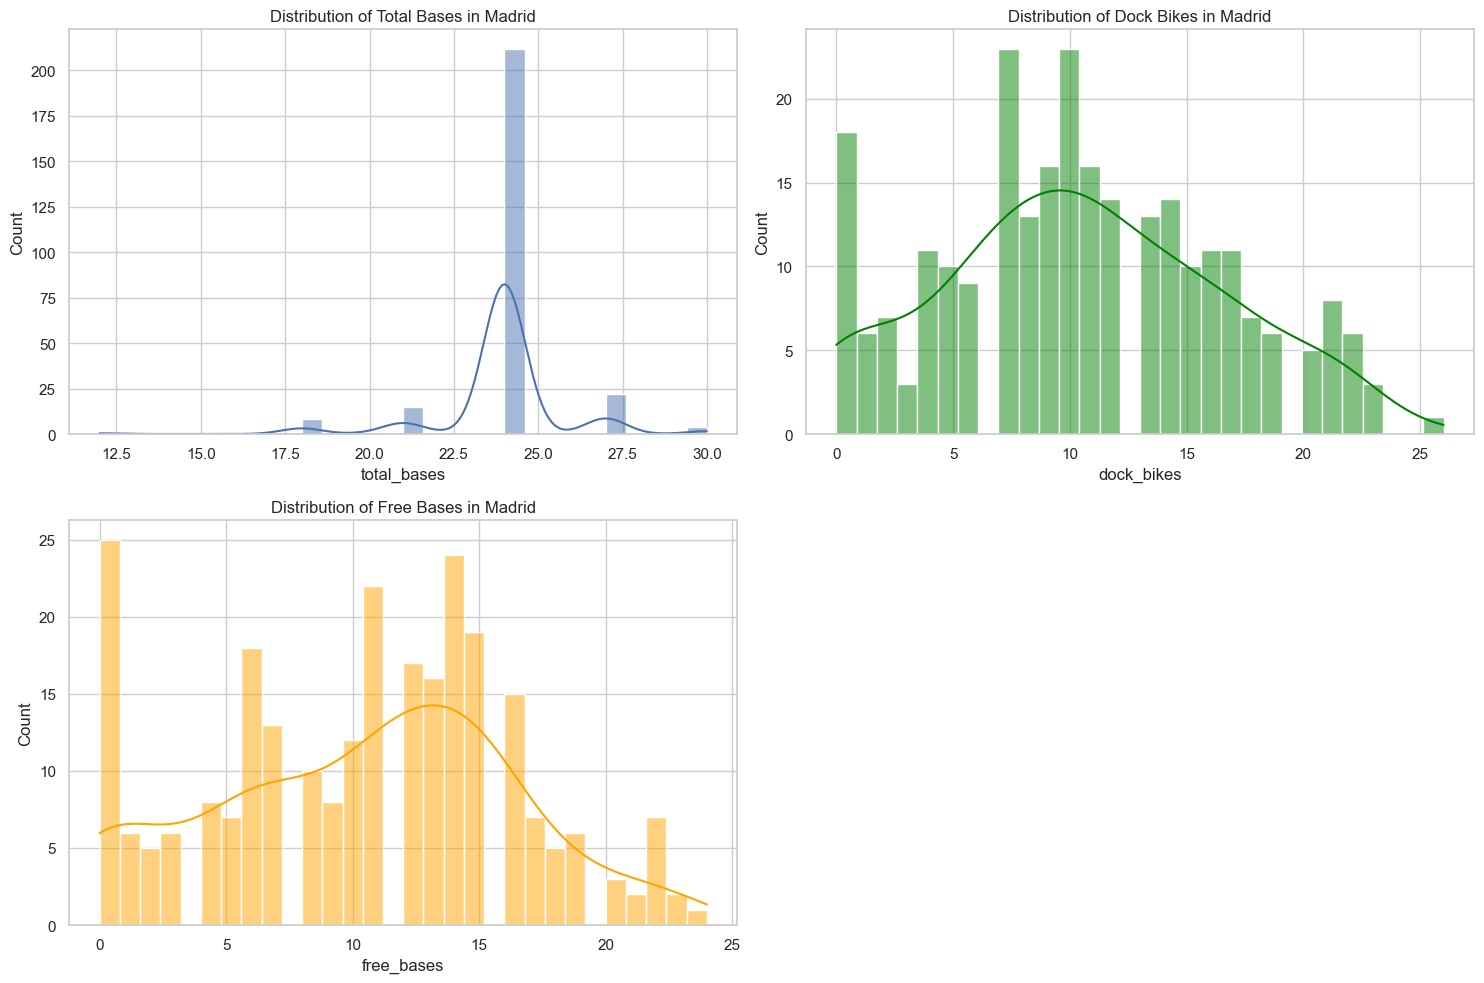

In [211]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Histogram for 'total_bases'
plt.subplot(2, 2, 1)
sns.histplot(bike_data_madrid['total_bases'], kde=True, bins=30)
plt.title('Distribution of Total Bases in Madrid')

# Histogram for 'dock_bikes'
plt.subplot(2, 2, 2)
sns.histplot(bike_data_madrid['dock_bikes'], kde=True, bins=30, color='green')
plt.title('Distribution of Dock Bikes in Madrid')

# Histogram for 'free_bases'
plt.subplot(2, 2, 3)
sns.histplot(bike_data_madrid['free_bases'], kde=True, bins=30, color='orange')
plt.title('Distribution of Free Bases in Madrid')

plt.tight_layout()
plt.show()


Total bases  
The majority of bike stations have a similar number of total bases, as indicated by the concentration of data around a common value. The distribution is relatively narrow, suggesting that most stations are designed with a similar capacity. There are a few outliers with significantly more bases. These might be located in areas of high traffic or key transport hubs.

Dock bikes  
The number of bikes currently docked at stations fluctuates more widely.
The spread suggests that bike usage patterns vary across different stations. Some stations consistently have more bikes docked, possibly indicating less frequent use or a higher number of incoming bikes.
The variation might also reflect different demand patterns, such as stations in residential areas versus those in business districts.

Free bases  
Similar to docked bikes, there's noticeable variability in the number of free bases across stations.
Stations with a high number of free bases might indicate lower usage or greater availability, which could be due to location, time of day, or other local factors.
Conversely, stations with fewer free bases might be experiencing higher demand or frequent use.

In [212]:
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=13)

for index, row in bike_data_madrid.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']  
    ).add_to(madrid_map)


madrid_map


## Confidence Intervals

In [213]:
bikes_data_2022_dublin.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012


I want to find the average available bike stands in Dublin. I will use 95% confidence, meaning that the alpha will be 5%. I chose to use the 95% because it's the most popular as usually alpha is 5% as per standard.

In [214]:
X = bikes_data_2022_dublin.iloc[:,5:6].values
X

array([[10],
       [19],
       [ 9],
       ...,
       [13],
       [22],
       [38]], dtype=int64)

In [215]:
#Create the confidence interval using Student's t at 95% confidence

st.t.interval(confidence = 0.95, df = len(X) -1, loc = np.mean(X), scale = st.sem(X))

(array([19.15350954]), array([19.24687165]))

At a 95% confidence level, the available stands bike stands in dublin are between 19.15 and 19.24 for the month of Jan 2022

The confidence interval found for bike stands is quite narrow. This means that most bike stations in Dublin seem to have a similar number of available stands. It's a good sign that the bike-sharing system is working well, with a balanced number of stands that are both in use and available at different stations.

This can be calculated with a formula as well - Lower and Upper limit

In [216]:
bikes_data_2022_dublin.describe()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,60.979413,32.000128,19.200191,12.741410,53.345687,-6.264389
std,37.757380,7.670569,9.636346,7.932004,0.007647,0.018114
min,2.000000,1.000000,0.000000,0.000000,53.330100,-6.310020
25%,31.000000,29.000000,12.000000,7.000000,53.339800,-6.275230
50%,61.000000,30.000000,19.000000,12.000000,53.345900,-6.262980
75%,90.000000,40.000000,26.000000,18.000000,53.351000,-6.251560
max,507.000000,40.000000,40.000000,40.000000,53.360000,-6.230850


Image(filename='studenttbike.png')

LL = mean - (x bar * std / n-1 ** 0.5)  
UL = mean + (x bar * std / n-1 ** 0.5)

In [217]:
LL = 19.20 - (1.95 * 9.63 / (163698 ** 0.5))
LL

19.153587045853424

In [218]:
UL = 19.20 + (1.95 * 9.63 / (163698 ** 0.5))
UL

19.246412954146574

There is a slight difference in the result because I took the ronded numbers from the decsriptive statistics, but it matches the confidence interval using Student's T. at 95% confidence.

## Comparison between bikes in Dublin and Madrid

Average Bike Availability:  
Hypothesis:  
Null (H0): There is no difference in average bike availability between Dublin and Madrid.  
Alternative (H1): There is a significant difference in average bike availability between Dublin and Madrid.  
Test: Independent two-sample t-test (parametric) if data is normally distributed; otherwise, Mann-Whitney U test (non-parametric).

In [219]:
avg_bikes_dublin = bikes_data_2022_dublin.groupby('STATION ID')['AVAILABLE_BIKES'].mean()

avg_bikes_madrid = bike_data_madrid.groupby('id')['dock_bikes'].mean()

normality_dublin = shapiro(avg_bikes_dublin)
normality_madrid = shapiro(avg_bikes_madrid)

print("Shapiro-Wilk Test for Dublin Data:", normality_dublin)
print("Shapiro-Wilk Test for Madrid Data:", normality_madrid)


Shapiro-Wilk Test for Dublin Data: ShapiroResult(statistic=0.9804618954658508, pvalue=0.10349570214748383)
Shapiro-Wilk Test for Madrid Data: ShapiroResult(statistic=0.9788081049919128, pvalue=0.0005713560967706144)


The Dublin data appears to be normally distributed (p-value > 0.05), suggesting that the average bike availability per station in Dublin follows a normal distribution.  
The Madrid data does not appear to be normally distributed (p-value < 0.05).  
Mann-Whitney U test will be used to compare the two datasets. This test does not assume normality and is robust across different distributions.

In [178]:
from scipy.stats import mannwhitneyu

mwu_result = mannwhitneyu(avg_bikes_dublin, avg_bikes_madrid)

mwu_result


MannwhitneyuResult(statistic=17817.0, pvalue=0.0009523171834220233)

The Mann-Whitney U test returned a p-value of approximately 0.00095. This p-value is below the typical alpha level of 0.05, indicating that there is a statistically significant difference in the average bike availability between Dublin and Madrid.

Conclusion:
Reject the Null Hypothesis (H0): There is a significant difference in the average bike availability between Dublin and Madrid. This suggests that the two cities differ in terms of the average number of bikes available at their respective bike stations.